### Урок 9. Инструменты разметки наборов данных

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

Создадим свой датасет собранный из отзывов на зарличные продукты на сайте https://otzovik.com/.
Для изучения возьмем продукт имеющий высокие оценки с достоточной выборкой - netflix
Используем scrapy чтобы собрать следующие данные:
- Комментарий пользователя
- Рейтинг
- Имя комментатора
Полученные данные сохраним в csv.

In [7]:
# Запустим сборшик данных один раз. После чего закомментируем.
# %run otzovik/runner.py

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML # HTML(df.to_html())

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


In [2]:
df = pd.read_csv('otzovik/data/comment.csv', engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
df.head()

,comment,rating,username
0,"удобно Почти год пользуюсь подпиской, там мног...",5,Marria1964
1,Улыбающийся аватар в хоррор-кинотеатре — это н...,4,TerraBit
2,Могу советовать! Вот и дошли мои потные руки д...,5,punkee
3,Выбирайте отечественное Где-то с неделю назад ...,5,ashu6303
4,Отличный канал! Я подписалась на Netflix уже б...,5,Severnaya Dama


<Axes: >

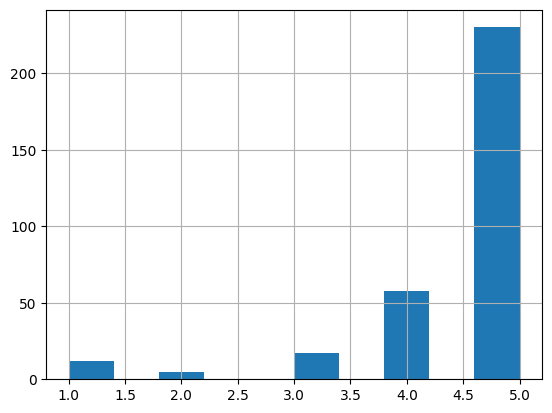

In [3]:
df["rating"].hist()

Структура собранных данных уже содержит оценочный рейтинг выставленный самими пользователями.
В учебных целях выполним разметку на основе правил ранжировав данные на две категории  - позитивных и негативных отзывов.

In [4]:
def evaluation_rule(row):
    if row["rating"] > 3:
        return "positive"
    else:
        return "negative"

In [5]:
df["user_evaluation"] = df.apply(evaluation_rule, axis=1)
df.head()

,comment,rating,username,user_evaluation
0,"удобно Почти год пользуюсь подпиской, там мног...",5,Marria1964,positive
1,Улыбающийся аватар в хоррор-кинотеатре — это н...,4,TerraBit,positive
2,Могу советовать! Вот и дошли мои потные руки д...,5,punkee,positive
3,Выбирайте отечественное Где-то с неделю назад ...,5,ashu6303,positive
4,Отличный канал! Я подписалась на Netflix уже б...,5,Severnaya Dama,positive


In [14]:
# import spacy
# nlp = spacy.load("ru_core_news_sm")

In [16]:
# def lemmatize(doc):
#     words = []
#     for token in doc:
#         if (token.is_stop != True) and (token.is_punct != True) and\
#             (token.is_space != True) and (token.is_digit != True):
#             words.append(token.lemma_)
#     return ' '.join(words)

In [20]:
# df_test['doc_text']= list(nlp.pipe(df['comment'], n_process=3, batch_size=1000).progress_apply(lemmatize))
# df_test.info()

In [ ]:

# df['doc_text']= list(nlp.pipe(df['comment'], n_process=3, batch_size=1000)).progress_apply(lemmatize)
# df.info()

In [35]:
# for doc in docs:
#     df['clear_text']= df['doc_text'].progress_apply(lemmatize)


In [6]:
# Для тестирования других инструментов атоматической разметки создадим отдельный малый датасет.
df_test = df[:20]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comment          20 non-null     object
 1   rating           20 non-null     int64 
 2   username         20 non-null     object
 3   user_evaluation  20 non-null     object
dtypes: int64(1), object(3)
memory usage: 772.0+ bytes


In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Лина\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

In [14]:
df_test['sentiment'] = df_test['comment'].apply(get_sentiment)

C:\Users\Лина\AppData\Local\Temp\ipykernel_9516\611015580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentiment'] = df_test['comment'].apply(get_sentiment)


In [15]:
df_test.head()

,comment,rating,username,user_evaluation,sentiment
0,"удобно Почти год пользуюсь подпиской, там мног...",5,Marria1964,positive,0.0
1,Улыбающийся аватар в хоррор-кинотеатре — это н...,4,TerraBit,positive,0.0
2,Могу советовать! Вот и дошли мои потные руки д...,5,punkee,positive,0.0
3,Выбирайте отечественное Где-то с неделю назад ...,5,ashu6303,positive,0.0
4,Отличный канал! Я подписалась на Netflix уже б...,5,Severnaya Dama,positive,0.0


In [16]:
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [17]:
df_test['sentiment_label'] = df_test['sentiment'].apply(get_sentiment_label)

C:\Users\Лина\AppData\Local\Temp\ipykernel_9516\441448083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentiment_label'] = df_test['sentiment'].apply(get_sentiment_label)


In [19]:
df_test.head(20)

,comment,rating,username,user_evaluation,sentiment,sentiment_label
0,"удобно Почти год пользуюсь подпиской, там мног...",5,Marria1964,positive,0.0,neutral
1,Улыбающийся аватар в хоррор-кинотеатре — это н...,4,TerraBit,positive,0.0,neutral
2,Могу советовать! Вот и дошли мои потные руки д...,5,punkee,positive,0.0,neutral
3,Выбирайте отечественное Где-то с неделю назад ...,5,ashu6303,positive,0.0,neutral
4,Отличный канал! Я подписалась на Netflix уже б...,5,Severnaya Dama,positive,0.0,neutral
5,Мало новинок. Больше сериалов. Без рекламы. На...,3,allMania,negative,0.0,neutral
6,классный контент в большом количестве Долго ду...,5,ФомаПростой,positive,0.0,neutral
7,Все плюсы и минусы. Netflix - один из популярн...,4,Soblaznitel naya,positive,0.0,neutral
8,Слишком толерантная площадка. Пришло время и я...,2,Андрей Лузанов,negative,0.0,neutral
9,балдею Все мы в курсе что за махина этот Netfl...,5,natalochka-san,positive,0.0,neutral


Определенно можно сделать вывод что данный инструмент не обрабатывает русский язык. 

In [38]:
text22 = 'Это великолепная проверка работы отвратительного скрипта'
text23 = "This is a great test of the disgusting script"
blob = TextBlob(text23)
blob.sentiment

Sentiment(polarity=-0.09999999999999998, subjectivity=0.875)

Можно использовать костыли в виде api сервисов представляющих услуги перевода. Но метод trancelite() для textblob перестал работать. Можно использовать бибилиотеку spacy в качестве переводчика и разметки данных. Но пока что мы попробуем разметить данные вручную используя инструмент label-studio.
Для этого создадим небольешой датасет для ручной разметки.

In [41]:
df = shuffle(df)
label_df, unlabel_df = train_test_split(df, train_size=0.2, random_state=15)
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 288 to 185
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comment          64 non-null     object
 1   rating           64 non-null     int64 
 2   username         64 non-null     object
 3   user_evaluation  64 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB


In [43]:
label_df.to_csv('comment_lebel.csv', index=False)

In [44]:
df_tt = pd.read_csv('comment_lebel.csv', engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
df_tt.head()

,comment,rating,username,user_evaluation
0,"Удобный Когда-то оформлял подписку на Netflix,...",5,Nilufar01,positive
1,лучший онлайн-кинотеатр Я уже несколько лет по...,5,mokakoi,positive
2,Очень крутое приложение Подписку нам подарила ...,5,MiraMAV,positive
3,Есть интересные сериалы и фильмы Ну что сказат...,4,Mikhail MD,positive
4,Это не кино Дважды пытались воспользоваться ус...,1,Андрей 121,negative


Мы провели ручную разметку нашего датасете. Посмотрим на результат.


In [45]:
df_leb_st = pd.read_csv('project1.csv', engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
df_leb_st.head()

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,user_evaluation,username
0,1,1,"Удобный Когда-то оформлял подписку на Netflix,...",2024-06-09T17:45:06.395006Z,1,8.041,5,Positive,2024-06-09T17:45:06.395006Z,positive,Nilufar01
1,2,1,лучший онлайн-кинотеатр Я уже несколько лет по...,2024-06-09T17:45:39.458237Z,2,4.069,5,Positive,2024-06-09T17:45:39.458237Z,positive,mokakoi
2,3,1,Очень крутое приложение Подписку нам подарила ...,2024-06-09T17:46:50.171812Z,3,21.534,5,Positive,2024-06-09T17:46:50.171812Z,positive,MiraMAV
3,4,1,Есть интересные сериалы и фильмы Ну что сказат...,2024-06-09T17:46:54.566653Z,4,1.866,4,Positive,2024-06-09T17:46:54.566653Z,positive,Mikhail MD
4,5,1,Это не кино Дважды пытались воспользоваться ус...,2024-06-09T17:47:01.435783Z,5,10.772,1,Negative,2024-06-09T17:47:01.435783Z,negative,Андрей 121


In [46]:
# Label Studio добавила нам несколько столбцоы не нужных данных, потому оставим только столбец sentiment	
df_leb_st = df_leb_st.drop(columns=['annotation_id', 'annotator', 'created_at', 'id','lead_time','updated_at'])
df_leb_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comment          64 non-null     object
 1   rating           64 non-null     int64 
 2   sentiment        64 non-null     object
 3   user_evaluation  64 non-null     object
 4   username         64 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.6+ KB


In [51]:
# По условию задачи нам нужно объединить датасет размеченный вручную с датасетом без разметки.
# pd.concat([df1, df2]).fillna(0)
all_comments = pd.concat([df_leb_st, unlabel_df]).fillna(0)
all_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 136
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comment          322 non-null    object
 1   rating           322 non-null    int64 
 2   sentiment        322 non-null    object
 3   user_evaluation  322 non-null    object
 4   username         322 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.1+ KB


In [69]:
all_comments.head(70)

,comment,rating,sentiment,user_evaluation,username
0,"Удобный Когда-то оформлял подписку на Netflix,...",5,Positive,positive,Nilufar01
1,лучший онлайн-кинотеатр Я уже несколько лет по...,5,Positive,positive,mokakoi
2,Очень крутое приложение Подписку нам подарила ...,5,Positive,positive,MiraMAV
3,Есть интересные сериалы и фильмы Ну что сказат...,4,Positive,positive,Mikhail MD
4,Это не кино Дважды пытались воспользоваться ус...,1,Negative,negative,Андрей 121
...,...,...,...,...,...
268,Лучшая платформа с фильмами и тд! Я недавно на...,5,0,positive,Кирилл 3131
97,Замечательный сервис Из всех мною ранее юзаных...,5,0,positive,CEOSAFAR
10,Неправильное пояснение при оплате Я просто реш...,1,0,negative,kommentator30067
230,Отличная вещь -советую Много и долго описывать...,5,0,positive,Anatolich94


По условиям задания нам нужно обучить модель для атоматической разметки данных на основе данных размеченных вручную. Для этозаменим категории данных оценки на 0 и 1.

In [72]:
educational = df_leb_st
educational['sentiment'] = educational['sentiment'].replace({'Negative': 0, 'Positive': 1})

C:\Users\Лина\AppData\Local\Temp\ipykernel_9516\2544766404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  educational['sentiment'] = educational['sentiment'].replace({'Negative': 0, 'Positive': 1})


In [73]:
educational.head()

,comment,rating,sentiment,user_evaluation,username
0,"Удобный Когда-то оформлял подписку на Netflix,...",5,1,positive,Nilufar01
1,лучший онлайн-кинотеатр Я уже несколько лет по...,5,1,positive,mokakoi
2,Очень крутое приложение Подписку нам подарила ...,5,1,positive,MiraMAV
3,Есть интересные сериалы и фильмы Ну что сказат...,4,1,positive,Mikhail MD
4,Это не кино Дважды пытались воспользоваться ус...,1,0,negative,Андрей 121


In [54]:
def train_model(df):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['comment'])
    y = df['sentiment']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [74]:
model, vectorizer = train_model(educational)

In [75]:
X_unlabeled = vectorizer.transform(unlabel_df['comment'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [76]:
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [77]:
labeled_reviews_new = unlabel_df.iloc[uncertainty.argsort()[:30]]
unlabeled_reviews_new = unlabel_df.iloc[uncertainty.argsort()[30:]]

In [78]:
labeled_reviews = pd.concat([df_leb_st, labeled_reviews_new])

In [79]:
labeled_reviews.head(94)

,comment,rating,sentiment,user_evaluation,username
0,"Удобный Когда-то оформлял подписку на Netflix,...",5,1.0,positive,Nilufar01
1,лучший онлайн-кинотеатр Я уже несколько лет по...,5,1.0,positive,mokakoi
2,Очень крутое приложение Подписку нам подарила ...,5,1.0,positive,MiraMAV
3,Есть интересные сериалы и фильмы Ну что сказат...,4,1.0,positive,Mikhail MD
4,Это не кино Дважды пытались воспользоваться ус...,1,0.0,negative,Андрей 121
...,...,...,...,...,...
143,Netflix – это идеальное место для всех киноман...,5,NaN,positive,Loldlold
221,Лучшее место для просмотра сериалов и фильмов ...,5,NaN,positive,Sm1len
124,Лучший онлайн-кинотеатр года! Netflix - это пр...,5,NaN,positive,Анастасия Гурман
193,Много сериалов Доброго времени суток! Netflix ...,5,NaN,positive,Sveta298


К сожалению результат обучения не удовлетворительный. Возможно причина снова в способности методов работатьс русским языком. Попробуем выполнить задачу на других данных.

In [85]:
df = pd.read_csv('lec/movie.csv', engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
df.head(10)


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [86]:
test_df = df. copy()

In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [93]:
def train_model_en(df):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['text'])
    y = df['label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [94]:
reviews = shuffle(test_df)
labeled, unlabeled = train_test_split(test_df, train_size=0.2, random_state=15)
unlabeled.head()

In [105]:
model, vectorizer = train_model_en(labeled)

In [95]:
X_unlabeled = vectorizer.transform(unlabeled['text'])
y_unlabeled_predicted = model.predict(X_unlabeled)
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [107]:
labeled_reviews_new = unlabeled.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled.iloc[uncertainty.argsort()[100:]]

In [110]:
labeled_reviews_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 21449 to 2839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
 1   label   100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [111]:
labeled_reviews = pd.concat([labeled, labeled_reviews_new])


In [112]:
labeled_reviews.head()

,text,label
29378,I just viewed MURDER AT THE VANITIES in the ne...,1
13332,The previous reviewer has said it exactly. I s...,1
1329,"I usually can tolerate twisted movies, but thi...",0
35600,This film is where the Batman franchise ought ...,1
9864,I am truly beginning to believe that Seagal is...,0


In [115]:
model, vectorizer = train_model_en(labeled_reviews)

In [116]:
# Тестовык данные возьмем из исходных данных ,которые у нас сохранены в оригинальном df
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [118]:
X_test = vectorizer.transform(df['text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(df['label'], y_test_predicted)

print(f1)

0.8821373743376417


Итоговая точность модели составила 88%. Что не очень хороший результат с учетом того что мы использовали уже размеченные датасет.
Однако из этого можно сделать вывод о неточности самой разметки или использовании иной языковой модели. 
Куда большей проблемой является недостаточность доступных инструментов для решения практических задач связанных с анализом русского языка.
Это еще больше актуализирует задачу обновления учебных планов отвечающих новым реалиям и ограничениям.